In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import random
import json
import csv

In [194]:
def create_city_graph(rows, cols, num_regions):
    """
    Gera um grafo representando uma cidade em uma malha quadriculada.
    Os cruzamentos são sequenciais dentro de cada região.
    """
    G = nx.grid_2d_graph(rows, cols)  # Malha de cruzamentos
    G = nx.convert_node_labels_to_integers(G)  # Rotula cruzamentos sequencialmente
    total_nodes = rows * cols

    # Distribuir os cruzamentos entre as regiões sequencialmente
    regions = []
    nodes_per_region = total_nodes // num_regions
    extra_nodes = total_nodes % num_regions  # Distribuir o restante

    start = 0
    for i in range(num_regions):
        size = nodes_per_region + (1 if i < extra_nodes else 0)
        regions.append({"start": start, "size": size, "id": f"CEP-{10000 + i}"})
        start += size

    # Atribuir nós às regiões
    for region in regions:
        start, size, region_id = region["start"], region["size"], region["id"]
        for node in range(start, start + size):
            G.nodes[node]["region"] = region_id
            G.nodes[node]["type"] = random.choice(["residential", "commercial", "industrial", "tourist"])

    # Atribuir atributos às arestas
    for u, v in G.edges:
        length = random.randint(50, 200)
        G.edges[u, v]["length"] = length
        G.edges[u, v]["speed_limit"] = random.choice([30, 40, 50, 60])
        G.edges[u, v]["cost"] = 1#length * random.randint(1000, 5000)

    return G, regions


def save_graph_and_regions_to_json(G, regions, filename):
    """
    Salva o grafo e as informações das regiões em um arquivo JSON.
    """
    graph_data = {
        "nodes": [
            {
                "id": i,
                "region": G.nodes[node]["region"],
                "type": G.nodes[node]["type"]
            }
            for i, node in enumerate(G.nodes)
        ],
        "edges": [
            {
                "source": u,
                "target": v,
                "length": G.edges[u, v]["length"],
                "speed_limit": G.edges[u, v]["speed_limit"],
                "cost": G.edges[u, v]["cost"]
            }
            for u, v in G.edges
        ],
        "regions": regions
    }

    with open(filename, "w") as f:
        json.dump(graph_data, f, indent=4)



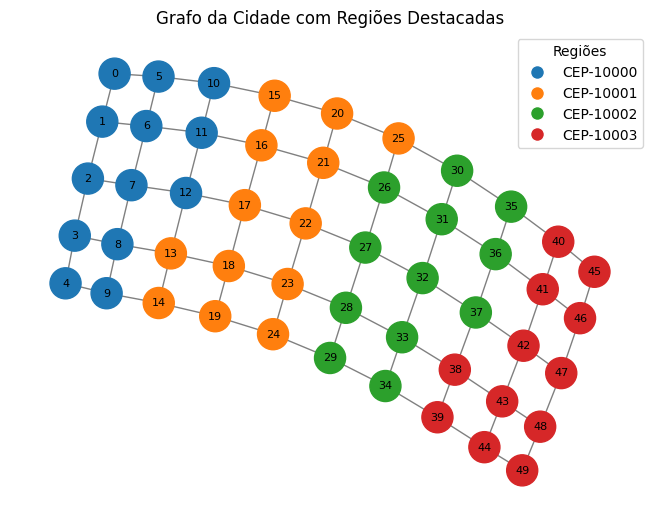

In [195]:
def visualize_city_graph(G, regions):
    """
    Visualiza o grafo da cidade, destacando as regiões com cores diferentes.
    
    Args:
        G (networkx.Graph): O grafo da cidade.
        regions (list): Lista de regiões com informações de 'start' e 'size'.
    """
    # Definir cores únicas para cada região
    region_colors = {}
    for i, region in enumerate(regions):
        region_colors[region["id"]] = f"C{i % 10}"  # Usa uma paleta de cores do Matplotlib

    # Criar listas para o layout e coloração
    node_colors = []
    for node in G.nodes:
        region_id = G.nodes[node]["region"]
        node_colors.append(region_colors[region_id])

    # Criar layout em forma de malha para visualização
    pos = nx.spring_layout(G, seed=42)  # Posicionamento estável para visualização
    nx.draw(
        G, pos, 
        with_labels=True, 
        node_color=node_colors, 
        node_size=500, 
        font_size=8, 
        edge_color="gray"
    )

    # Criar legenda para as cores
    legend_elements = [
        plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=color, markersize=10, label=region_id)
        for region_id, color in region_colors.items()
    ]
    plt.legend(handles=legend_elements, loc="upper right", title="Regiões")
    plt.title("Grafo da Cidade com Regiões Destacadas")
    plt.show()


# Exemplo de uso
rows, cols = 10, 5 # Dimensões da malha
num_regions = 4

# Gerar grafo e visualizar
city_graph, regions = create_city_graph(rows, cols, num_regions)
visualize_city_graph(city_graph, regions)


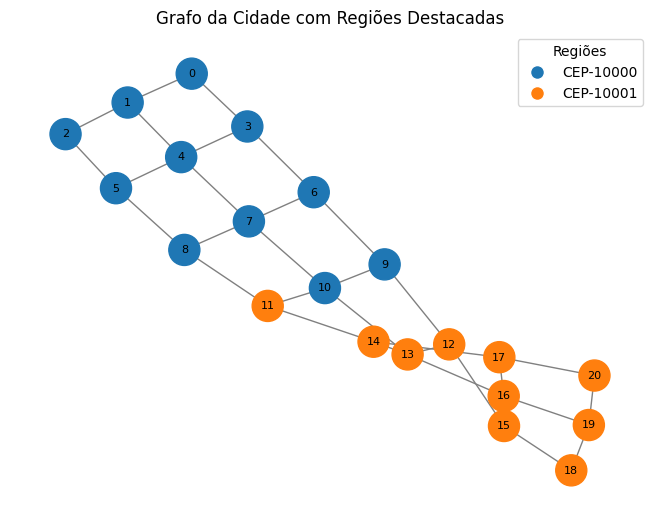

0   21
3   24
6   27
9   30
12   33
15   36
18   39
Novo nó adicionado: Graph with 42 nodes and 71 edges
Arestas conectadas ao novo nó: [(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 6), (3, 4), (4, 7), (4, 5), (5, 8), (6, 9), (6, 7), (7, 10), (7, 8), (8, 11), (9, 12), (9, 10), (10, 13), (10, 11), (11, 14), (12, 15), (12, 13), (13, 16), (13, 14), (14, 17), (15, 18), (15, 16), (16, 19), (16, 17), (17, 20), (18, 19), (19, 20)]


In [210]:
def add_node_to_graph(G, regions, rows, cols, num_regions, extra_regions):
    """
    Adiciona um novo nó ao grafo `G`, conectando-o ao `target_node`.
    """

    total_nodes = rows * cols
    num_new_region = num_regions + extra_regions

    # Criando o grafo de malha 2D
    H = nx.grid_2d_graph(rows, cols)  # Grafo com coordenadas (i, j)
    
    # Remapeando os rótulos para começar de `num_regions` ou outro valor
    H = nx.relabel_nodes(H, {node: total_nodes + idx for idx, node in enumerate(H.nodes)})
    
    
    
    # Distribuir os cruzamentos entre as regiões sequencialmente
    regions_local = []
    nodes_per_region = total_nodes // num_new_region
    extra_nodes = total_nodes % num_new_region  # Distribuir o restante

    start = total_nodes  # Começar a partir do número que você quiser (por exemplo, num_regions)
    for i in range(num_new_region):
        size = nodes_per_region + (1 if i < extra_nodes else 0)
        region_id = f"CEP-{10000 + i + num_regions}"
        regions_local.append({"start": start, "size": size, "id": region_id})
        regions.append({"start": start, "size": size, "id": region_id})
        start += size

    # Atribuir nós às regiões
    for region in regions_local:
        start, size, region_id = region["start"], region["size"], region["id"]
        for node in range(start, start + size):
            if node in H.nodes:  # Verificar se o nó existe no grafo H
                H.nodes[node]["region"] = region_id
                H.nodes[node]["type"] = random.choice(["residential", "commercial", "industrial", "tourist"])

    # Atribuir atributos às arestas
    for u, v in H.edges:
        length = random.randint(50, 200)
        H.edges[u, v]["length"] = length
        H.edges[u, v]["speed_limit"] = random.choice([30, 40, 50, 60])
        H.edges[u, v]["cost"] = 1#length * random.randint(1000, 5000)

    # Compor os grafos H e G
    F = nx.compose(G, H)

    for i in range(0, total_nodes, cols):
        print(i, " ", i + total_nodes)
        length=random.randint(50, 200)
        F.add_edge(i + cols - 1, i + total_nodes, length=length, speed_limit=random.choice([30, 40, 50, 60]),cost = 1)#length * random.randint(1000, 5000)"""

    return F  # Retorna o grafo composto

# Exemplo de uso:
rows, cols, num_regions = 7, 3, 2  # Exemplo de malha
G, regions = create_city_graph(rows, cols, num_regions)
visualize_city_graph(G, regions)

# Adiciona um nó conectado ao nó 5
F = add_node_to_graph(
    G,
    regions,
    rows= rows,
    cols = cols,
    num_regions = num_regions,
    extra_regions = 2
)



print(f"Novo nó adicionado: {F}")
print(f"Arestas conectadas ao novo nó: {list(G.edges(F))}")


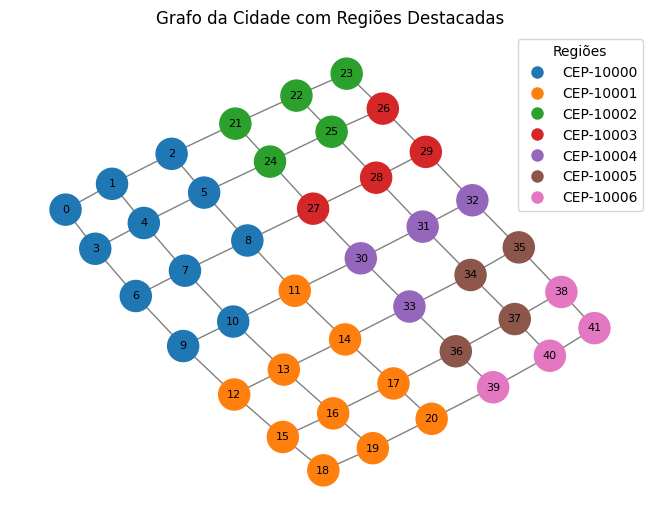

In [209]:
visualize_city_graph(F, regions)

In [ ]:
def export_graph_to_csv(graph, regions, nodes_file, edges_file, regions_file):
    """
    Exporta o grafo `graph` para dois arquivos CSV:
    - `nodes_file`: Contém os nós e seus atributos.
    - `edges_file`: Contém as arestas e seus atributos.
    """
    # Exportar nós
    with open(nodes_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['node', 'region', 'type'])  # Cabeçalhos
        for node, attrs in graph.nodes(data=True):
            writer.writerow([node, attrs.get('region', ''), attrs.get('type', '')])

    # Exportar arestas
    with open(edges_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['source', 'target', 'length', 'speed_limit', 'cost'])  # Cabeçalhos
        for u, v, attrs in graph.edges(data=True):
            writer.writerow([u, v, attrs.get('length', ''), attrs.get('speed_limit', ''), attrs.get('cost', '')])

    # Exportar regiões
    with open(regions_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['start', 'size', 'id'])  # Cabeçalhos
        for region in regions:
            writer.writerow([region["start"], region["size"], region["id"]])


export_graph_to_csv(F, regions, "nodes.csv", "edges.csv", "regions.csv")
print("Arquivos nodes.csv e edges.csv gerados com sucesso!")


Arquivos nodes.csv e edges.csv gerados com sucesso!
